In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

## Activation functions

In [2]:
def sigmoid(x):
    """Returns the sigmoid function for a given variable x"""
    return 1/(1+np.exp(-x))

def tanh(x):
    """Returns the tanH activation for a given variable x"""
    return np.tanh(x)

def cosine(x):
    """Returns the cosine activation for a given variable x"""
    return np.cos(x)

def gaussian(x):
    """Returns the gaussian activation for a given variable x"""
    return np.exp(-((x**2)/2))

## Inputs & Outputs

In [3]:
#Linear
data = np.loadtxt("Data/1in_sine.txt")
x = data[:, :1] # All input variables stored as x
y = data[:, 1:] # All test variables stored as y

## Simplified Neural Network

In [29]:
class NeuralNetwork(object):
    
    def __init__(self, x, y):
        """
        The NeuralNetwork object has a fitness attribute that is initialised at infinity
        and will will be updated
        
        The architecture of the network can be adjusted by changing the inputLayerSize,
        outputLayerSize, hiddenlayerSize. 
        
        The Network hyperparameters:
        -----------------------------
        W1: weights from the input layer to the hidden layer. Randomly initialised
        W2: weights from the hidden layer to the output layer. Randomly initialised
        a2_func: activation function of the hidden layer
        yHat_func: activation of the output layer
        b1: input to hidden bias
        b2: hidden to output bias
        
        The Particle Parameters:
        ------------------------
        position: uses the getParams function which yields an array of parameter values
        personal_best_position: is initialised as current position
        personal_best_value: is initialised at infinity
        self.velocity: is initialised at 0 in the shape of the position array
        """
        
        #Network architecture 
        self.inputLayerSize=1
        self.outputLayerSize=1
        self.hiddenlayerSize=3
        
        #Network hyperparameters
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenlayerSize)
        self.W2 = np.random.randn(self.hiddenlayerSize, self.outputLayerSize)
        self.a2_func = tanh
        self.yHat_func = tanh
        self.b1 = random.random()
        self.b2 = random.random()
        
        #Particle parameters
        self.position = self.getParams
        self.personal_best_position = self.position
        self.personal_best_value = float("inf")
        self.velocity = np.zeros(self.getParams.shape)
        self.informants = []
        self.informants_best_value = float("inf")
        self.informants_best_position = self.getParams
        
        #Network imput, outputs, fitness
        self.imput = x
        self.output = y
        self.yHat = 0
        self.fitness = float("inf") # At the beggining I put it as 0, but I understand the inf here for comparison.
        
    
    def move(self):
        """The move function will change the particle position based on particle velocity"""
        self.position = self.position + self.velocity
     
    def __str__(self):
        """Returns a string representation of particle position and network fitness value"""
        return f"Position:{self.position}, Fitness:{self.fitness}"   
    
    def forward(self):
        """
        Forward propagation of the neural network 
        z2: is the dot product of input x and W1 plus bias(b1)
        a2: is the activation of the z2
        z3: is the dot product of a2 and W2 plus bias(b2)
        yHat: is the activation of the z3
        """
        self.z2 = np.dot(self.imput, self.W1) + self.b1       
        self.a2 = self.a2_func(self.z2)                 
        self.z3 = np.dot(self.a2, self.W2) + self.b2 
        self.yHat = self.yHat_func(self.z3)      
        return self.yHat 
    
    def mse(self):
        mse = np.square(np.subtract(self.output,self.yHat)).mean()
        self.fitness = mse
        return mse
    
    @property
    def getParams(self):
        """Returns the parameters of the neural network in an array that can be used in PSO"""
        array = self.W1.ravel()
        array = np.append(array,self.W2.ravel())
        array = np.append(array,self.b1)
        array = np.append(array,self.b2)
        return array

In [30]:
# Steps to make the neural network work: first call the method neural network, then forward, then fitness
    # then call the variable network.fitness
nn1 = NeuralNetwork(x,y)
nn1.forward()
a = nn1.mse() 
len(nn1.yHat)

100

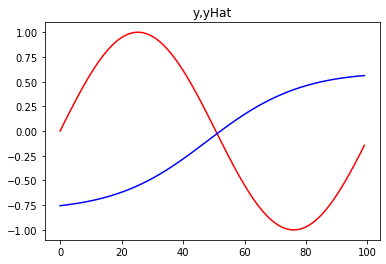

In [31]:
plt.figure()
y2 = nn1.yHat
plt.plot(y,"red",y2,"blue")
plt.title("y,yHat")
# plt.xlabel("Iterations")
# plt.ylabel("Errors")
plt.show()

## PSO

In [32]:
class PSO:
    
    def __init__(self, n_networks):
        """
        The PSO object contains an input n_networks which is the number of neural networks
        that are to be initialised.
        networks: is a list to store the initialised networks
        global_best_value: is initialised as infinity
        global_best_position: gets its shape from the Neural Network's getParams function
        yHat: is initialised at floating point 0. It is needed to plot a graph
        yHat_l: is a list to store the yHat values that is needed to plot a graph
        """
        self.n_networks = n_networks
        self.networks = [NeuralNetwork(x,y) for i in range(self.n_networks)]
        self.global_best_value = float("inf")
        #self.informants_best_value = float("inf")
        #self.informants_best_poisition = NeuralNetwork(x,y).getParams.shape
        self.global_best_position = NeuralNetwork(x,y).getParams.shape
        self.global_best_yHat = 0
    
    def set_personal_best(self):
        """
        The set_personal_best method loops through a list of networks, assisigns a 
        fitness_candidate which is the network's fitness. If the networks' 
        personal_best_value is greater that fitness_candidate; it then assigns the 
        personal_best_value as the fitness_candidate. It then updates the network's
        personal_best_position as the network's position.
        """
        for network in self.networks:
            if(network.personal_best_value > network.fitness):
                network.personal_best_value = network.fitness
                network.personal_best_position = network.position
                
    
    def get_personal_best(self):
        particles_position = []
        for network in self.networks:
            particles_position.append(network.position)
        return 
    
    # The variable informants is in each network, here I just create informants for each of them.
    def set_informants(self):
        for network in self.networks:
            informants = random.choices(self.networks, k=3) # 3 informants for each particle
            network.informants = informants
    
    # In this funcion I am instantiating the best_value of each informant in     
    def set_informants_best(self):
        for network in self.networks:
            for informant in network.informants:
                if(informant.personal_best_value > informant.fitness):
                    informant.informants_best_value = informant.fitness
                    informant.informants_best_position = informant.position
        
    def set_global_best(self):
        """
        The set_global_best method loops through a list of networks and assigns the 
        best_fitness_candidate to the network's fitness. If the global_best_value 
        is greater than the best_fitness_candidate the global_best_value is assigned as 
        best_fitness_candidate and the global_best_position becomes the network's position
        """
        for network in self.networks:
             if(self.global_best_value > network.personal_best_value):
                self.global_best_value = network.personal_best_value
                self.global_best_position = network.position
                self.global_best_yHat = network.yHat
                
        
    def get_global_best(self):
        print (f"Value:{self.global_best_value}, Position: {self.global_best_position}")
    
                
    def move_particles(self):
        """
        The move_particles method contains:
        
        the Intertia weight(W)
        Cognitive(c1)
        Social(c2) weights of the PSO algorithm which can be adjusted.
        
        This method loops through a list of neural networks and stores the product of 
        of interia weight multiplied by network's velocity plus a random number multiplied 
        by the cognitive weight multiplied by the difference of the personal_best_position
        of the network and network's position plus the social weight into a random number
        multiplied by the difference of global_best_position of the networks and network's
        position in a variable called new_velocity. It then assigns the network's velocity
        to this variable and calls the move function from NeuralNetwork class. 
        """
        a = 0.5 # Intertia
        b = 0.8 #Cognitive/personal velocity
        c = 0.9 # Social velocity
        d = 1 # informants
        e = 1 # Jump
        
        for network in self.networks:
            new_velocity = (a*network.velocity) + (b*random.random())*\
            (network.personal_best_position - network.position) +\
            (c*random.random())*(self.global_best_position - network.position) + \
            (d*random.random())*(network.informants_best_position - network.position)
            network.velocity = e*new_velocity
            network.move()
            
        # I added the Jump (the value is 1 by the pseudocode of the book they suggest, so does not affect)
        # but I think we do need to put it.
        
    def optimise(self):
        """
        The optimise method loops through a list of neural networks and:
        w1: takes the first three numbers from network's position array which is then 
        reshaped to the dimensions of the NeuralNetwork object's W1 parameter
        w2: takes the next three numbers from network's position array which is then 
        reshaped to the dimensions of the NeuralNetwork object's W2 parameter
        b1: takes the 7th item from the array
        b2: takes the 8th item from the array
        
        and uses these variables to forward propagate the neural network with these values.
        z2: is the dot product of input(x) and w1 plus bias(b1)
        a2: is the activation of the z2 using the activation function in NeuralNetwork class
        z3: is the dot product of a2 and W2 plus bias(b2)
        yHat: is the activation of the z3 using the activation function in NeuralNetwork class
        yHat_l: the yHat values are stored in a list for plotting graphs
        error: is calculated by using the Mean Square Error(mse) method using the target value(y)
        and predicted value(yHat). The network's fitness is updated using the error.
        """
        for network in self.networks:
            #w1 = network.position[0:3]
            #w2 = network.position[3:6]
            #network.w1 = np.reshape(w1,(NeuralNetwork(x,y).W1.shape)) 
            #network.w2 = np.reshape(w2,(NeuralNetwork(x,y).W2.shape)) 
            #b1 = network.position[6:7]
            #b2 = network.position[7]
            #print(f"uno: {network.position},fitness:{network.fitness}")
            
         # by calling the methods here, the optimization is automatic and I do not need to call them outside.
         # just by calling PSO(num_NN) it is done.
            network.forward()
            network.mse()
            self.set_personal_best()
            self.set_informants()
            self.set_informants_best()
            self.set_global_best()
            self.move_particles()
            

In [62]:
pso1 = PSO(10)

c = []
for network in pso1.networks:
    c.append(network.position)
    c.append(network.fitness)
    
pso1.optimise()
pso1.get_global_best()
# Look at the first value since is the 
p = []
for network in pso1.networks:
    p.append(network.position)
    p.append(network.fitness)

c,p

Value:0.11212133415489653, Position: [ 0.82648946 -1.10456335 -0.50402559 -1.85137912  0.65577589 -0.19710692
  0.24597829  0.20745615]


([array([ 0.82648946, -1.10456335, -0.50402559, -1.85137912,  0.65577589,
         -0.19710692,  0.24597829,  0.20745615]),
  inf,
  array([-0.67853828,  0.39412623,  1.39614773,  0.97385803,  0.96767576,
         -1.06547766,  0.37091392,  0.08380692]),
  inf,
  array([-0.9768376 , -0.57730434, -0.72158396,  1.07607141,  0.98724196,
          0.23436944,  0.27622692,  0.51588805]),
  inf,
  array([-1.34090167,  0.43370913,  1.01528649, -0.89537936, -0.28084412,
         -1.25044684,  0.14331317,  0.10317409]),
  inf,
  array([-0.21437527, -0.05559317,  0.85939994, -0.04650363, -1.67267389,
         -0.23033385,  0.97446358,  0.37495024]),
  inf,
  array([ 0.22510098,  0.72341687,  1.15283138, -1.47724174,  0.72423231,
          1.01011423,  0.54532857,  0.29643675]),
  inf,
  array([ 0.95815969, -0.11335194,  1.45715353, -0.77661581, -0.72917012,
          0.58240034,  0.57631743,  0.18687205]),
  inf,
  array([-0.20975233,  0.71549945,  0.05146784, -0.4538739 ,  1.20286864,
         

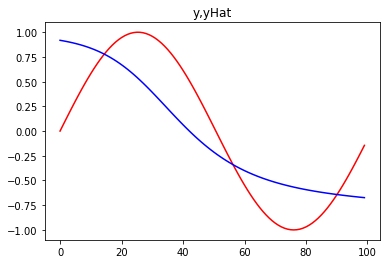

In [51]:
plt.figure()
yHat1 = pso1.global_best_yHat
plt.plot(y,"red",yHat1,"blue")
plt.title("y,yHat")
# plt.xlabel("Iterations")
# plt.ylabel("Errors")
plt.show()

In [52]:
pso = PSO(20)
n_iterations = 1000
error_list = []
yHat = 0
# The start time to calculate how long the algorithm takes. 
start = time.process_time()
# Sets the number of starting iterations/epochs

iterations = 0
while(iterations < n_iterations) or (pso.global_best_value == 0.):
    
    
    
    # Starting from the 1st iteration: prints the number of iterations, the global_best_value 
    # and the predicted(yHat) value. Also appends the global_best_value to the error_list
    #if iterations!=0:
     #   print(f"Iteration:{str(iterations)} Error:{pso.global_best_value} yHat:{pso.global_best_yHat}")
    #    error_list.append(pso.global_best_value)
    pso.optimise()
    #print("new iteration")
    # PSO algorithm is executed by this methods 
    # Updates iterations
    iterations +=1
 

    #the global_best_value and the time taken to execute the algorithm
print(f"GlobalBest: {pso.global_best_position} iters: {iterations} GlobalBestVal: {pso.global_best_value}")
print(f"------------------------ total time taken: {time.process_time() - start} seconds") 

    

GlobalBest: [-3.75861359e-02  3.73577534e-01 -5.94450826e-01 -5.76904689e-04
 -1.26802950e+00  1.95329658e+00  7.79750764e-02  1.39563429e-01] iters: 1000 GlobalBestVal: 0.12259093930384914
------------------------ total time taken: 26.07160399999998 seconds


In [53]:
yvalue = pso.global_best_value
yposition = pso.global_best_position
yposition, yvalue

(array([-3.75861359e-02,  3.73577534e-01, -5.94450826e-01, -5.76904689e-04,
        -1.26802950e+00,  1.95329658e+00,  7.79750764e-02,  1.39563429e-01]),
 0.12259093930384914)

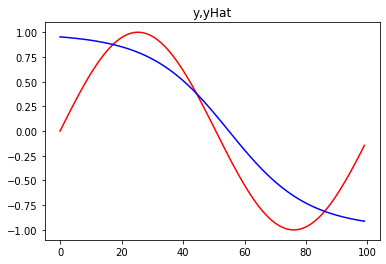

In [54]:
yHat = pso.global_best_yHat
plt.figure()

plt.plot(y,"red",yHat,"blue")
plt.title("y,yHat")
# plt.xlabel("Iterations")
# plt.ylabel("Errors")
plt.show()

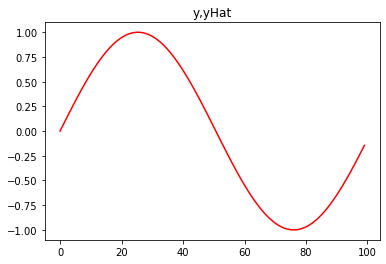

In [13]:
fitness = pso.global_best_value
plt.figure()
 
    # this needs a real time graph ---
plt.plot(y,"red",fitness,"blue")
plt.title("y,yHat")
# plt.xlabel("Iterations")
# plt.ylabel("Errors")
plt.show()